In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc

In [6]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

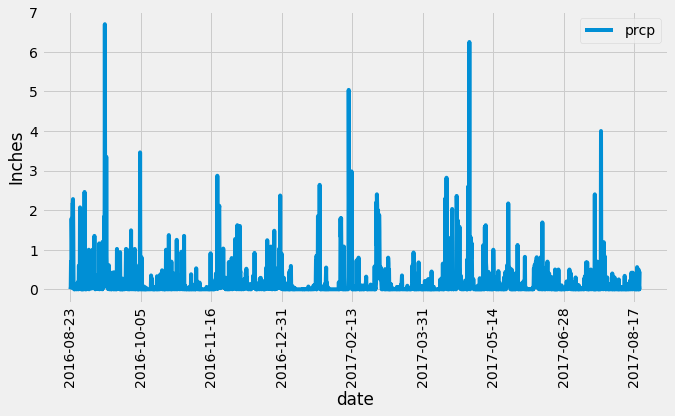

In [11]:
# Get the last date and the the date 1 year ago from it
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago=dt.date(int(last_date[0][0:4]),int(last_date[0][5:7]),int(last_date[0][8:10])) - dt.timedelta(days=365)

#Generate a queries to select the required data and send the statement directly to pandas dataframe
stmt = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= str(year_ago),Measurement.date <= last_date[0] ).statement
Measurement_df = pd.read_sql_query(stmt, session.bind)
Measurement_df.set_index(["date"],inplace = True)
Measurement_df=Measurement_df.dropna()
Measurement_df.sort_index(inplace = True)
clm = Measurement_df.plot(rot = 90,figsize = (10,5))
clm = plt.ylabel("Inches")

In [250]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [251]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).group_by('station').count()

9

In [252]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stmt=session.query(Measurement.station,func.count().label('Count')).group_by(Measurement.station).order_by(desc('Count')).statement
station_count = pd.read_sql_query(stmt, session.bind)
station_count

,station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
station_mx=session.query(Measurement.station,func.count().label('Count')).group_by(Measurement.station).order_by(desc('Count')).first()
print(f"Station {station_mx[0]} has the highest number of observations")

Station USC00519281 has the highest number of observations


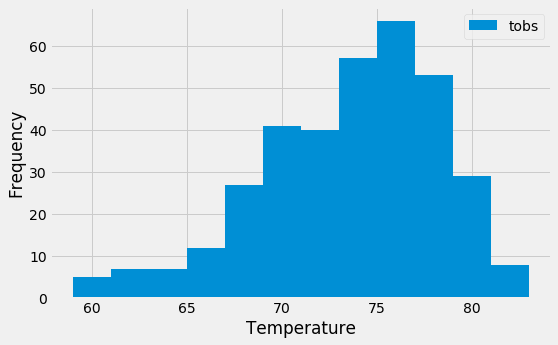

In [20]:
# a query to retrieve the last 12 months of temperature observation data (TOBS).
stmt = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.date >= str(year_ago),Measurement.date <= last_date[0],Measurement.station == station_mx[0]).statement
tobs_df = pd.read_sql_query(stmt, session.bind)
tobs_his = tobs_df['tobs'].hist(bins=12,figsize = (8,5))
tobs_his = plt.legend(["tobs"])
tobs_his=plt.xlabel('Temperature')
tobs_his=plt.ylabel('Frequency')

In [59]:
stmt = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.date >= str(year_ago),Measurement.date <= last_date[0],Measurement.station == station_mx[0]).all()

s = stmt[0:10]
s[:][3]

('USC00519281', '2016-08-26', 80.0)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
